# **TUGAS 2 Komputasi Material**


Arif Tia Diva  
22/503229/PA/21616

Potensial elektrostatik di sebuah titik dalam ruang 3 dimensi dari sistem muatan $q_1$ yang terletak di titik (0,0)$ dan $q_2$ di titik $(a, b)$ diberikan oleh:

$$
V(x,y,z) = k \left( \frac{q_1}{\sqrt{x^2 + y^2}} + \frac{q_2}{\sqrt{(x - a)^2 + (y - b)^2}} \right)
$$

dengan $ k $ adalah konstanta Coulomb. Untuk keperluan komputasi, anggap $ k = 1 $, $ q_1 = 1 $, dan $ q_2 = 2 $.  
Muatan $ q_2 $ berada pada bidang $ xy $ dengan $ a = 10 $ dan $ b = 8 $ (Nilai $ a $ dan $ b $ boleh diganti sesuai kebutuhan).

Jika nilai akarnya $ (x_0,y_0) $, ujilah apakah titik $ (x_0,y_0) $ adalah saddle point?

**Hint 1**: Lakukan proses optimasi terhadap $ V(x,y) $.

**Hint**: Jika matriks $ A $ didefinisikan sebagai:

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

maka invers dari $ A $ adalah:

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$


## Pengujian saddle point

$$
D(x, y) = f_{xx}(x, y) f_{yy}(x, y) - f_{xy}^2(x, y).
\tag{8.2}
$$

$ D $ is the determinant of the $ 2 \times 2 $ matrix of second-order partial derivatives:

$$
\mathbf{H}(x, y) =
\begin{bmatrix}
f_{xx}(x, y) & f_{xy}(x, y) \\
f_{xy}(x, y) & f_{yy}(x, y)
\end{bmatrix}.
\tag{8.3}
$$

$\mathbf{H}$ is known as the **Hessian matrix** of $ f $ and can be thought of as the analog of the second derivative of a function of one variable.

### The Second-Derivative Test

- If $ D(x_0, y_0) > 0 $ and $ f_{xx}(x_0, y_0) > 0 $, then $ (x_0, y_0) $ is a **local minimum**.
- If $ D(x_0, y_0) > 0 $ and $ f_{xx}(x_0, y_0) < 0 $, then $ (x_0, y_0) $ is a **local maximum**.
- If $ D(x_0, y_0) < 0 $, then $ (x_0, y_0) $ is a _saddle point_.
- If $ D(x_0, y_0) = 0 $, then we cannot draw a conclusion.


## Langkah-langkah Pengerjaan

1. Menghitung turunan parsial pertama dari $ V(x,y,z) $ terhadap ( x ) dan ( y ), anggap z = 0  : 
$$
\frac{\partial V}{\partial x} = -\frac{q_1 x}{(x^2 + y^2)^{3/2}} - \frac{q_2 (x - a)}{((x - a)^2 + (y - b)^2)^{3/2}}
$$

$$
\frac{\partial V}{\partial y} = -\frac{q_1 y}{(x^2 + y^2)^{3/2}} - \frac{q_2 (y - b)}{((x - a)^2 + (y - b)^2)^{3/2}}
$$

2. Menghitung turunan parsial kedua dari $ V(x,y) $:
$$
\frac{\partial^2 V}{\partial x^2} = \frac{q_1 (2x^2 - y^2)}{(x^2 + y^2)^{5/2}} + \frac{q_2 (2(x - a)^2 - (y - b)^2)}{((x - a)^2 + (y - b)^2)^{5/2}}
$$

$$
\frac{\partial^2 V}{\partial y^2} = \frac{q_1 (2y^2 - x^2)}{(x^2 + y^2)^{5/2}} + \frac{q_2 (2(y - b)^2 - (x - a)^2)}{((x - a)^2 + (y - b)^2)^{5/2}}
$$

$$
\frac{\partial^2 V}{\partial x \partial y} = \frac{3 q_1 x y}{(x^2 + y^2)^{5/2}} + \frac{3 q_2 (x - a) (y - b)}{((x - a)^2 + (y - b)^2)^{5/2}}
$$


3. Menggunakan metode Newton-Rhapson untuk mencari nilai akar
$$
     \begin{bmatrix}
     x_{n+1} \\
     y_{n+1}
     \end{bmatrix}
     =
     \begin{bmatrix}
     x_n \\
     y_n
     \end{bmatrix}
     -
     H^{-1}
     \begin{bmatrix}
     \frac{\partial V}{\partial x} \\
     \frac{\partial V}{\partial y}
     \end{bmatrix}
     $$


4. Menggunakan determinan dari matriks Hessian untuk menguji apakah titik $ (x_0, y_0) $ adalah saddle point: $$ \text{Det}(H) = \left( \frac{\partial^2 V}{\partial x^2} \right) \left( \frac{\partial^2 V}{\partial y^2} \right) - \left( \frac{\partial^2 V}{\partial x \partial y} \right)^2 $$ Jika $ \text{Det}(H) < 0 $, maka titik tersebut adalah saddle point.

Titik kritis (4.14213562373095, 3.3137084989847603)
Nilai determinan: -0.0002616218055473436
Titik (4.14213562373095, 3.3137084989847603) adalah saddle point karena determinan H kurang  dari 0


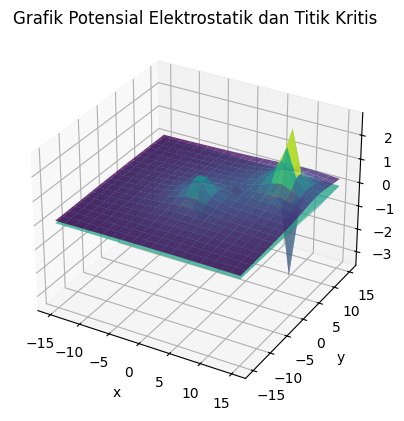

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fungsi potensial
def V(x, y, a=10, b=8, q1=1, q2=2):
    return q1 / np.sqrt(x**2 + y**2) + q2 / np.sqrt((x - a)**2 + (y - b)**2)

# Turunan pertama
def dV_dx(x, y, a=10, b=8, q1=1, q2=2):
    return -q1 * x / (x**2 + y**2)**(3/2) - q2 * (x - a) / ((x - a)**2 + (y - b)**2)**(3/2)

def dV_dy(x, y, a=10, b=8, q1=1, q2=2):
    return -q1 * y / (x**2 + y**2)**(3/2) - q2 * (y - b) / ((x - a)**2 + (y - b)**2)**(3/2)

# Turunan kedua
def d2V_dx2(x, y, a=10, b=8, q1=1, q2=2):
    return q1 * (2*x**2 - y**2) / (x**2 + y**2)**(5/2) + q2 * (2*(x - a)**2 - (y - b)**2) / ((x - a)**2 + (y - b)**2)**(5/2)

def d2V_dy2(x, y, a=10, b=8, q1=1, q2=2):
    return q1 * (2*y**2 - x**2) / (x**2 + y**2)**(5/2) + q2 * (2*(y - b)**2 - (x - a)**2) / ((x - a)**2 + (y - b)**2)**(5/2)

def d2V_dxdy(x, y, a=10, b=8, q1=1, q2=2):
    return 3 * q1 * x * y / (x**2 + y**2)**(5/2) + 3 * q2 * (x - a) * (y - b) / ((x - a)**2 + (y - b)**2)**(5/2)

# Implementasi metode Newton-Raphson 2D tanpa np.linalg
def newton_raphson_2d(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    history = [(x, y)]
    for _ in range(max_iter):
        # Hitung turunan pertama
        fx = dV_dx(x, y)
        fy = dV_dy(x, y)
        
        # Hitung turunan kedua
        fxx = d2V_dx2(x, y)
        fyy = d2V_dy2(x, y)
        fxy = d2V_dxdy(x, y)
        
        # Bentuk matriks Hessian
        H = np.array([[fxx, fxy], [fxy, fyy]])
        
        # Hitung determinan Hessian
        det_H = fxx * fyy - fxy * fxy
        
        # Hitung invers Hessian secara manual
        H_inv = (1 / det_H) * np.array([[fyy, -fxy], [-fxy, fxx]])
        
        # Update nilai x dan y
        delta = H_inv @ np.array([fx, fy])
        x -= delta[0]
        y -= delta[1]
        
        history.append((x, y))
        
        # Cek konvergensi
        if np.linalg.norm(delta) < tol:
            break
    
    return x, y, history

# Inisialisasi titik awal
x0, y0 = 5, 5

# Mencari titik kritis
x_crit, y_crit, history = newton_raphson_2d(x0, y0)
print(f"Titik kritis ({x_crit}, {y_crit})")

# Menguji apakah titik kritis adalah saddle point
H = np.array([[d2V_dx2(x_crit, y_crit), d2V_dxdy(x_crit, y_crit)], [d2V_dxdy(x_crit, y_crit), d2V_dy2(x_crit, y_crit)]])
det_H = d2V_dx2(x_crit, y_crit) * d2V_dy2(x_crit, y_crit) - d2V_dxdy(x_crit, y_crit) * d2V_dxdy(x_crit, y_crit)

print(f"Nilai determinan: {det_H}")

if det_H < 0:
    print(f"Titik ({x_crit}, {y_crit}) adalah saddle point karena determinan H kurang  dari 0")
elif det_H > 0:
    print(f"Titik ({x_crit}, {y_crit}) adalah local minima/maxima")
elif det_H == 0:
    print(f"Titik ({x_crit}, {y_crit}) tidak bisa ditentukan karena sama dengan 0")
    
# Visualisasi grafik 3D
x = np.linspace(-15, 15, 20)
y = np.linspace(-15, 15, 20)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)
A = dV_dx(X, Y)
B = dV_dy(X, Y)
C = (X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot_surface(X, Y, A, cmap='viridis', alpha=0.5)
ax.plot_surface(X, Y, B, cmap='viridis', alpha=0.5)

# ax.plot_surface(X, Y, C, cmap='viridis', alpha=0.5)

ax.plot([x_crit], [y_crit], [V(x_crit, y_crit)], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y)')
ax.set_title('Grafik Potensial Elektrostatik dan Titik Kritis')
plt.show()



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# # Fungsi potensial
# def V(x, y, a=10, b=8, q1=1, q2=2):
#     return q1 / np.sqrt(x**2 + y**2) + q2 / np.sqrt((x - a)**2 + (y - b)**2)
V = q1 / np.sqrt(x**2 + y**2) + q2 / np.sqrt((x - a)**2 + (y - b)**2)
x = np.Symbol('x')
y = np.Symbol('y')
dV_dx = V.diff(x)
dV_dy = V.diff(y)
d2V_dx2 = dV_dx.diff(x)
d2V_dy2 = dV_dy.diff(y)
d2V_dxdy = dV_dx.diff(y)

# Turunan pertama
# def dV_dx(x, y, a=10, b=8, q1=1, q2=2):
#     return -q1 * x / (x**2 + y**2)**(3/2) - q2 * (x - a) / ((x - a)**2 + (y - b)**2)**(3/2)

# def dV_dy(x, y, a=10, b=8, q1=1, q2=2):
#     return -q1 * y / (x**2 + y**2)**(3/2) - q2 * (y - b) / ((x - a)**2 + (y - b)**2)**(3/2)

# # Turunan kedua
# def d2V_dx2(x, y, a=10, b=8, q1=1, q2=2):
#     return q1 * (2*x**2 - y**2) / (x**2 + y**2)**(5/2) + q2 * (2*(x - a)**2 - (y - b)**2) / ((x - a)**2 + (y - b)**2)**(5/2)

# def d2V_dy2(x, y, a=10, b=8, q1=1, q2=2):
#     return q1 * (2*y**2 - x**2) / (x**2 + y**2)**(5/2) + q2 * (2*(y - b)**2 - (x - a)**2) / ((x - a)**2 + (y - b)**2)**(5/2)

# def d2V_dxdy(x, y, a=10, b=8, q1=1, q2=2):
#     return 3 * q1 * x * y / (x**2 + y**2)**(5/2) + 3 * q2 * (x - a) * (y - b) / ((x - a)**2 + (y - b)**2)**(5/2)

# Implementasi metode Newton-Raphson 2D tanpa np.linalg
def newton_raphson_2d(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    history = [(x, y)]
    for _ in range(max_iter):
        # Hitung turunan pertama
        fx = dV_dx(x, y)
        fy = dV_dy(x, y)
        
        # Hitung turunan kedua
        fxx = d2V_dx2(x, y)
        fyy = d2V_dy2(x, y)
        fxy = d2V_dxdy(x, y)
        
        # Bentuk matriks Hessian
        H = np.array([[fxx, fxy], [fxy, fyy]])
        
        # Hitung determinan Hessian
        det_H = fxx * fyy - fxy * fxy
        
        # Hitung invers Hessian secara manual
        H_inv = (1 / det_H) * np.array([[fyy, -fxy], [-fxy, fxx]])
        
        # Update nilai x dan y
        delta = H_inv @ np.array([fx, fy])
        x -= delta[0]
        y -= delta[1]
        
        history.append((x, y))
        
        # Cek konvergensi
        if np.linalg.norm(delta) < tol:
            break
    
    return x, y, history

# Inisialisasi titik awal
x0, y0 = 5, 5

# Mencari titik kritis
x_crit, y_crit, history = newton_raphson_2d(x0, y0)
print(f"Titik kritis ({x_crit}, {y_crit})")

# Menguji apakah titik kritis adalah saddle point
H = np.array([[d2V_dx2(x_crit, y_crit), d2V_dxdy(x_crit, y_crit)], [d2V_dxdy(x_crit, y_crit), d2V_dy2(x_crit, y_crit)]])
det_H = d2V_dx2(x_crit, y_crit) * d2V_dy2(x_crit, y_crit) - d2V_dxdy(x_crit, y_crit) * d2V_dxdy(x_crit, y_crit)

print(f"Nilai determinan: {det_H}")

if det_H < 0:
    print(f"Titik ({x_crit}, {y_crit}) adalah saddle point karena determinan H kurang  dari 0")
elif det_H > 0:
    print(f"Titik ({x_crit}, {y_crit}) adalah local minima/maxima")
elif det_H == 0:
    print(f"Titik ({x_crit}, {y_crit}) tidak bisa ditentukan karena sama dengan 0")
    
# Visualisasi grafik 3D
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)
A = dV_dx(X, Y)
B = dV_dy(X, Y)
C = (X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot_surface(X, Y, A, cmap='viridis', alpha=0.5)
ax.plot_surface(X, Y, B, cmap='viridis', alpha=0.5)

# ax.plot_surface(X, Y, C, cmap='viridis', alpha=0.5)

ax.plot([x_crit], [y_crit], [V(x_crit, y_crit)], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y)')
ax.set_title('Grafik Potensial Elektrostatik dan Titik Kritis')
plt.show()



NameError: name 'q1' is not defined